In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

C:\Users\naumh\AppData\Local\Temp\ipykernel_6004\4181702328.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,x
0,-2
1,-1
2,1
3,2


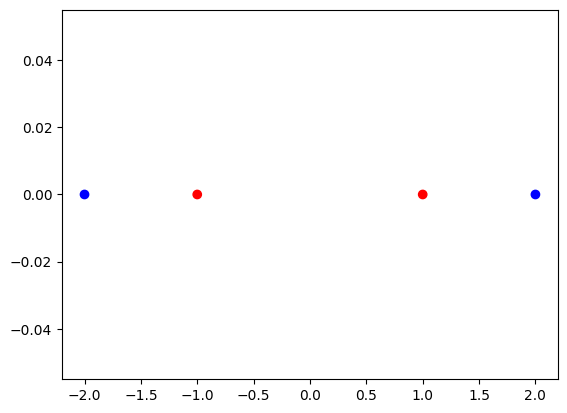

In [2]:
# Now let's have a non-separable dataset
data = {'x': [-2, -1, 1, 2],
        'y': [-1, 1, 1, -1]}
df = pd.DataFrame(data)

plt.scatter(df['x'], np.zeros_like(df['x']), c=df['y'], cmap='bwr', marker='o')

# Separate the features and the target
X = df[['x']].values
y = df['y'].values

pd.DataFrame(X, columns=['x'])

In [3]:
# Compute the Euclidean distances using broadcasting
distances = np.sqrt((X - X.T)**2)

# Convert the distances to a DataFrame for display
pd.DataFrame(distances, columns=['L1', 'L2', 'L3', 'L4'])

,L1,L2,L3,L4
0,0.0,1.0,3.0,4.0
1,1.0,0.0,2.0,3.0
2,3.0,2.0,0.0,1.0
3,4.0,3.0,1.0,0.0


In [4]:
# Apply the RBF kernel to the Euclidean distance matrix with a specific gamma
# Experiment with different values of gamma
#exponential term decays

#grid search gives perfect gamma

gamma = 0.1 
rbf_features = np.exp(-gamma * distances ** 2)

# Convert the RBF features into a DataFrame for display
pd.DataFrame(rbf_features, columns=['L1', 'L2', 'L3', 'L4'])

,L1,L2,L3,L4
0,1.000000,0.904837,0.406570,0.201897
1,0.904837,1.000000,0.670320,0.406570
2,0.406570,0.670320,1.000000,0.904837
3,0.201897,0.406570,0.904837,1.000000
